### Generics

In [126]:
import string
import numpy as np

In [127]:
phrase = "To be, or not to be, that is the question"


In [128]:
phrase_list = [i for i in phrase]

In [129]:
def generate_random_solution(size , bin_str_size = 7):
    phrase = ''
    for letter in range(size):
        binary_letter_string = "".join(str(np.random.randint(0,2)) for i in range(bin_str_size))
        phrase = phrase + binary_letter_string
    return phrase

In [130]:
individual = generate_random_solution(len(phrase))
individual

'11011010010110110100010001001000010111011011000111000101000100111000010111111111110011010011001010011010111010111010101010100111010001011001101101111111101011011110001111101001011001000100101001100110111001100010110011011000110000000111100100011011000101010001011001111111110100101001111'

In [131]:
int("1111111", 2)

127

In [132]:
all_letters = string.printable[0:95]
#all_letters = string.printable[10:36]
print(all_letters)
print(len(all_letters))

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 
95


In [133]:
#The scaler does not limit the max value,
#Instead it map the possible values in 
#The binary string 1111111 from [0, 127] to [0, 94]
#If we use a binary string 11111111 for ex [0, 255]
#The result would be 189 and we must clamp it if needed
#scale(int('11111111', 2))
# -> 189
def scale(value, new_min = 0, new_max = 94, old_max = 127):
#def scale(value, new_min = 0, new_max = 25, old_max = 31):
    return np.round(((value - 0) / (old_max - 0)) * (new_max - new_min) + new_min)

In [134]:
def inverse_scale(scaled_value, new_min=0, new_max=94, old_max=127, old_min=0):
#def inverse_scale(scaled_value, new_min=0, new_max=25, old_max=31, old_min=0):
    return np.round(((scaled_value - new_min) / (new_max - new_min)) * (old_max - old_min) + old_min)

In [135]:
def decode_binary_to_phrase(individual, bin_str_size = 7):
    phrase = ""
    for pos in range(0, len(individual), bin_str_size):
        binary_letter = str(individual[pos: pos+bin_str_size])
        #if int(binary_letter, 2) > 94:
        #    int_value = 94
        #else:
        #    int_value = int(binary_letter, 2)
        
        int_value = int(scale(int(binary_letter, 2)))
        
        letter = all_letters[int_value]
        phrase = phrase + letter 
    return phrase

In [136]:
individual_phrase = decode_binary_to_phrase(individual)
individual_phrase

'>g:ON^,P7+L};TD<"u:%&~&,]%7sFi%$*mqAu% ZW'

In [137]:
def individual_score(phrase, individual_phrase):
    phrase_list = [i for i in phrase]
    individual_list = [i for i in individual_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if individual_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    if score == 0:
        score = 0.0001
    else:
        score = (score / len(phrase))
        
    return 1 - score

In [138]:
score = individual_score(phrase, individual_phrase)
score

0.975609756097561

In [139]:
text_list = []
for i in range(100):
    individual = generate_random_solution(len(phrase))
    print(individual)
    individual_phrase = decode_binary_to_phrase(individual)
    print(individual_phrase)
    score = individual_score(phrase, individual_phrase)
    print(score)
    text_list.append(individual_phrase)
    print("_"*100 + '\n')

01010111101111001000010000010011110001000000010000011110110011100001111010000110010100110101000000100111101111101110000010111100011011100011001101011011001011101010111000111110110000100010100010111001110001001011101110011100101011011000101001001110110110001000110000111010111010100001010
w?cMmc6m/5X.jLWK@za,j=(ynAP8Wd_l#,S>OA^;7
0.975609756097561
____________________________________________________________________________________________________

01010011111011001001100000111000110001100101110000000101100100100011001101110111011100110001111010011111101011011110101001101110011101110100110001011011101000000111011010001001000011110100011110111001101000000101011101010001110110101011110010110011000011001000100010000001100001101111111
u|e2QjF4S9>_i{Lx^kW],>L^OO:|V1yY>zgA-p24 
0.9999
____________________________________________________________________________________________________

110001101010101110000110001111000101010001001011010111101110010110000111001111100101110110011010111010011011100

In [140]:
text_list

['w?cMmc6m/5X.jLWK@za,j=(ynAP8Wd_l#,S>OA^;7',
 'u|e2QjF4S9>_i{Lx^kW],>L^OO:|V1yY>zgA-p24 ',
 ',v@,,Yg)[+/.=<ZGZwF^{>UmqkZ~y#nzok`Fs,#Kt',
 '`fetiCUEAsgd~ALJ}15Ce^4EGwW8ck&VwjIIzqt(4',
 '4Q9-vnAnZt2o}ML[rekLO?vhP))Glj{%C.h1ZW le',
 "H47e^KI-x#O=BO.p>ZV-J'Uo81p7QVG&g~*Aq[gj,",
 'b)F)\\iDF6!{v1u3gL04r(WPK]vTpnp+YwMzF\\U(YB',
 "rOy#Mi-CWRi//Gf~dMZ'odpqWxWopNZIeE&Dp C!t",
 'rERWA2$ <hyk{;f8y<Mk!Wr:^p,N>oD#Sv[Cd0FRI',
 '{W9#[/W}W{;0{4?O~,!W. Q"l!=.&%oE<]cB.Gj[I',
 'OTVy)8]zKC/#`<]4<F^[SC,%"xdm>:0#}ic>7lxy*',
 "PK&a<ddxmI!e-mgeUZ6*Fk$dnxOR>'} +aR^Gl^&a",
 'aO+t[w,^VkJ3FSfM@]^&7>6WZ,WQ~c1&Xg}Z/g4~7',
 "8;yirn>_R'x$87Bm;H:)>v?!jO^jI6,41F]y@L&)F",
 '$g]UUjVAj1A.7N/bkl8[r~3u.WU4ULgIp^F#3~>>W',
 ')lRhrFf>4V>Bd~WG&rMf@g3b5hxZf^[\\#anE*ZRlX',
 'Fvd^7c>UA>LfBL4S&9Fj~I*XOZx^z\\dR6IAHk)T&"',
 '[aCva_u[gYm@2/1F7#k={7CtC[{Fj$PA_x/7`~C5W',
 'qmliAizzu.[fb252TZw]$sZ\\IgT~]03luDgeCF[),',
 'HlVH;&"5aoD#oECt]s#4dbuVZLgP{+\\}XRy)J?jgy',
 "lvL{AkP1ZrDe7F.GWeYgtS`YNOC,U%3wwGK8'azrc",
 "9IUpL:#C0,WK67;T.t)m^d-GN3

In [141]:
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def string_to_image(text, image_size=(500, 100), font_size=20):
    # Create a new image with a white background
    image = IMG.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # You can customize the font and its size
    font = ImageFont.truetype("arial.ttf", font_size)

    # Calculate the text size and position it in the center
    text_width, text_height = draw.textsize(text, font)
    x = (image_size[0] - text_width) / 2
    y = (image_size[1] - text_height) / 2

    # Draw the text on the image
    draw.text((x, y), text, fill="black", font=font)

    return image

In [142]:
import imageio
from IPython.display import display, Image

def generate_GIF(text_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True);

    image_files = []

    for i, text in enumerate(text_list):
        image = string_to_image(text);
        image_file = os.path.join(image_folder, f"image_{i}.png");
        image.save(image_file);
        image_files.append(image_file);



    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=1);  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file);

    #print(f"GIF saved to {output_gif}")


    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path));

C:\Users\Felps\AppData\Local\Temp\ipykernel_19704\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_19704\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_19704\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_19704\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users

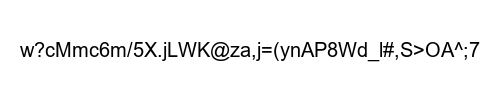

In [143]:
generate_GIF(text_list);

### Simulated Annealing

In [144]:
#Select a initial Solution
initial_solution = generate_random_solution(len(phrase))

In [145]:
len(initial_solution)

287

In [146]:
def perturbate_solution(s, n):
    for i in range(n):
        pos = np.random.choice(len(s))
        
        binary_list = list(s)
        
        if binary_list[pos] == '0':
            binary_list[pos] = '1'
        else:
            binary_list[pos] = '0'
        
        s = ''.join(binary_list)
    
    return s

In [147]:
initial_solution == perturbate_solution(initial_solution, 1)

False

In [148]:
#Select the temperature change counter
k = 0.95

#Select the temperature cooling Schedule
def cooling_schedule(T, k):
    return k * T

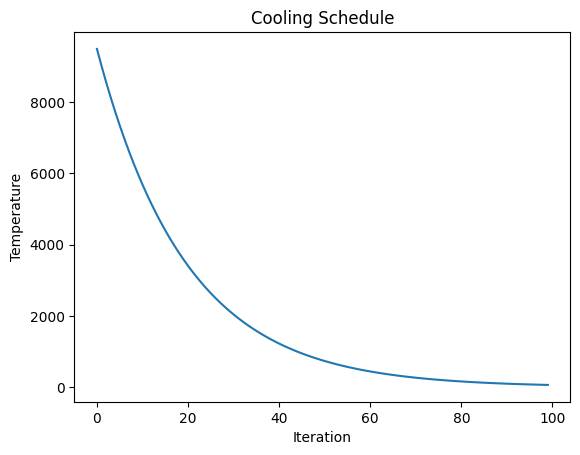

In [149]:
import matplotlib.pyplot as plt

temperature = 10000
k = 0.95
t_list = []
for i in range(100):
    temperature = cooling_schedule(temperature, k)
    t_list.append(temperature)
    
plt.plot(t_list);
plt.title("Cooling Schedule");
plt.xlabel("Iteration");
plt.ylabel("Temperature");

In [150]:
#Select a repetition schedule
#number of iterations executed at each temperature
def repetition_schedule(T):
    #TODO
    return 5

In [151]:

def encode_phrase_to_bin(phrase, bin_str_size = 7):

    str_list = [i for i in phrase]

    final_string = ''
    for idx in range(len(str_list)):
        letter = str_list[idx]
        integer_representation = all_letters.index(letter)
        binary_string = bin(int(inverse_scale(integer_representation)))[2:].zfill(bin_str_size) 
        final_string += binary_string
    return final_string

In [152]:
encode_phrase_to_bin('hello')

'00101110010011001110000111000100000'

In [153]:
decode_binary_to_phrase('00101110010011001110000111000100000')

'hello'

In [154]:
#Select a initial Solution
s0 = generate_random_solution(len(phrase))
observation = 0

min_temperature = 0.000001
max_temperature = 100
score_list = []
bin_list = []
#max_score_list, min_score_list = [], []
#Select the temperature change counter
k = 0.998
bin_phrase = encode_phrase_to_bin(phrase)
#Select an initial temperature
T = max_temperature

while T > min_temperature:
    iterations_over_T = repetition_schedule(T)
    
    #max_score_over_t, min_score_over_t = 0, 0 
    #score_over_t = []
    for i in range(iterations_over_T):
        
        #Generate a new solution
        s1 = perturbate_solution(s0, 1)
        
        s1_score = individual_score(bin_phrase, s1)
        s0_score = individual_score(bin_phrase, s0)
        
        delta = s1_score - s0_score
        
        if delta <= 0:
            s0 = s1
            
        else: #delta > 0
            p = np.exp(-delta/T)
            if np.random.random() > p:
                s0 = s1
                
        observation += 1
        score_list.append(s0_score)
        
        #score_over_t.append(s0_score)
    #max_score_list.append(np.max(score_over_t))
    #min_score_list.append(np.min(min_score_over_t))
    T = cooling_schedule(T, k)
    
    #Helper Functions
    
    if observation % 10 == 0:
        bin_list.append(s0)
        
    if observation % 1000 == 0:
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        print(decode_binary_to_phrase(s0))
        print(s0)
        
    
    
    if s0_score == 0:
        
        print(f"Observation: {observation} | Temperature {T} | score: {s0_score} | p: {p}")
        print(decode_binary_to_phrase(s0))
        print(s0)
        
        break

Observation: 1000 | Temperature 67.00516137378217 | score: 0.013937282229965153 | p: 0.9999481045696337
To be, or?not to be,?that is the wue4tion
10010100100000111111100011110010011110001111111110100000010010011011110011111010000001001111111111010011101000001111111000111100100111100011110111101001110010111000111001001111111111001100001001101111111010011100101110010011111111101010110101001001001100001100100111001100001000000011111
Observation: 1325 | Temperature 58.829267534782886 | score: 0.0 | p: 0.9999408925303281
To be, or not to be, that is the question
10010100100000111111100011110010011110001111111110100000010010011111110011111010000001001111111111010011101000001111111000111100100111100011111111101001110010111000111001001111111111001100001001101111111010011100101110010011111111101000110101001001001101001100100111001100001000000011111


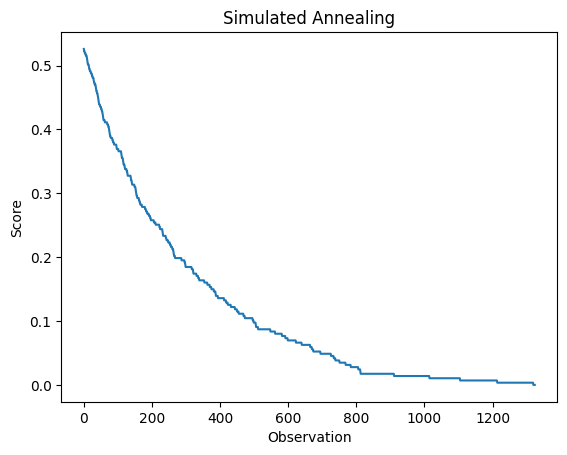

In [155]:
plt.plot(score_list);
plt.title("Simulated Annealing");
plt.xlabel("Observation");
plt.ylabel("Score");

C:\Users\Felps\AppData\Local\Temp\ipykernel_19704\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_19704\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_19704\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_19704\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users

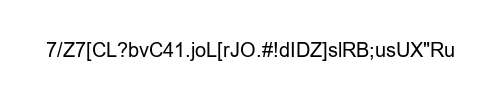

In [156]:
text_list = [decode_binary_to_phrase(bin_string) for bin_string in bin_list]
generate_GIF(text_list);